### y=p+p1X1=ax+b Linear Regression一元线性回归参照第12节课

###y=p+p1X1+p2X2+p3X3+...+pnXn Multiple Linear Regression多元线性回归参照第13节课

###y=p+p1X1+p2X1(2)+p3X1(3)+...+pnX1(n) Polynomial Linear Regression多项式回归

In [4]:
# Import necessary libraries 
#Scikit-learn框架中，回归模型的性能评估的分数(Score)，其实使用的就是『决定系数』
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### 决定系数即 R 平方值，反应因变量的全部变异能通过回归关系被自变量解释的比例。 如R平方为0.8，则表示回归关系可以解释因变量80%的变异。 换句话说，如果我们能控制自变量不变，则因变量的变异程度会减少 80%。

In [5]:
# Import the Height Weight Dataset 
data = pd.read_excel('Lesson14-age-height.xlsx') 

In [9]:
data

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [7]:
#Store the data in the form of dependent and independent variables separately
X = data.iloc[:, 0:1].values 
y = data.iloc[:, 1].values

In [8]:
X

array([[10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80]], dtype=int64)

In [10]:
y

array([138, 138, 138, 139, 139, 139, 140, 140, 140, 141, 141, 141, 142,
       142, 142, 143, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147,
       148, 148, 149, 149, 150, 150, 151, 152, 153, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 175, 178, 180, 183, 185, 188, 190, 193, 195, 199,
       203, 204, 205, 206, 207, 208], dtype=int64)

In [15]:
X = data.iloc[:,0:-1].values 

In [16]:
X 

array([[10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80]], dtype=int64)

In [17]:
X.shape

(71, 1)

In [18]:
X

array([[10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80]], dtype=int64)

In [19]:
y.shape

(71,)

In [20]:
y

array([138, 138, 138, 139, 139, 139, 140, 140, 140, 141, 141, 141, 142,
       142, 142, 143, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147,
       148, 148, 149, 149, 150, 150, 151, 152, 153, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 175, 178, 180, 183, 185, 188, 190, 193, 195, 199,
       203, 204, 205, 206, 207, 208], dtype=int64)

In [21]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
X_train.shape

(49, 1)

In [23]:
y_train.shape

(49,)

In [24]:
#Fit the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [27]:
X_test

array([[36],
       [37],
       [58],
       [32],
       [40],
       [61],
       [17],
       [69],
       [44],
       [80],
       [66],
       [38],
       [41],
       [52],
       [43],
       [65],
       [79],
       [72],
       [53],
       [14],
       [75],
       [60]], dtype=int64)

In [28]:
LinReg.predict(X_test)

array([152.90005813, 153.8194466 , 173.1266044 , 149.22250426,
       156.577612  , 175.8847698 , 135.43167726, 183.23987754,
       160.25516587, 193.35315067, 180.48171214, 154.73883506,
       157.49700047, 167.6102736 , 159.3357774 , 179.56232367,
       192.43376221, 185.99804294, 168.52966207, 132.67351186,
       188.75620834, 174.96538134])

In [29]:
y_test

array([148, 148, 167, 146, 150, 170, 140, 185, 153, 208, 178, 149, 150,
       162, 152, 175, 207, 193, 163, 139, 203, 169], dtype=int64)

In [30]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,LinReg.predict(X_test))

In [31]:
score1

0.8727873738671587

### R2_score = 1，样本中预测值和真实值完全相等，没有任何误差，表示回归分析中自变量对因变量的解释越好。

R2_score = 0。此时分子等于分母，样本的每项预测值都等于均值。

### 数据集的样本越大，R²越大，因此，不同数据集的模型结果比较会有一定的误差，此时可以使用Adjusted R-Square (校正决定系数）,能对添加的非显著变量给出惩罚

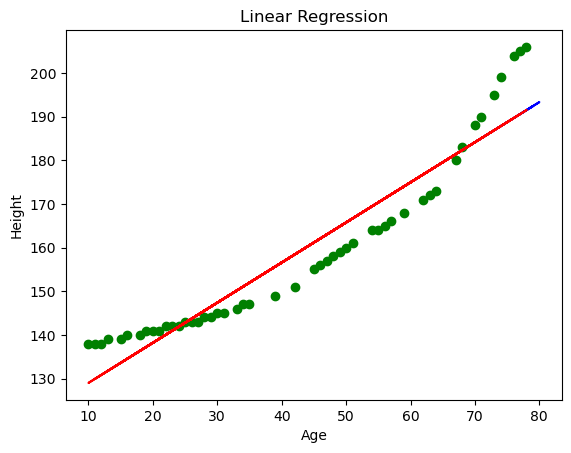

In [34]:
# Visualise the Linear Regression Result
plt.scatter(X_train, y_train, color = 'green') 
  
plt.plot(X_test, LinReg.predict(X_test), color = 'blue') 
plt.plot(X_train, LinReg.predict(X_train), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Age') 
plt.ylabel('Height') 
  
plt.show()

In [35]:
# Add the polynomial term to the equation/model
from sklearn.preprocessing import PolynomialFeatures 
  
polynom = PolynomialFeatures(degree = 2) #degree=2是维度，默认是2
X_polynom = polynom.fit_transform(X_train) 
  
X_polynom

array([[1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 6.400e+01, 4.096e+03],
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 5.100e+01, 2.601e+03],
       [1.000e+00, 5.900e+01, 3.481e+03],
       [1.000e+00, 6.300e+01, 3.969e+03],
       [1.000e+00, 6.700e+01, 4.489e+03],
       [1.000e+00, 4.200e+01, 1.764e+03],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 7.800e+01, 6.084e+03],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 3.900e+01, 1.521e+03],
       [1.000e+00, 6.200e+01, 3.844e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.600e+01, 6.760e+02],
       [1.000e+00, 3.000e+01, 9.00

In [36]:
X_polynom.shape

(49, 3)

In [37]:
#Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_polynom, y_train)

LinearRegression()

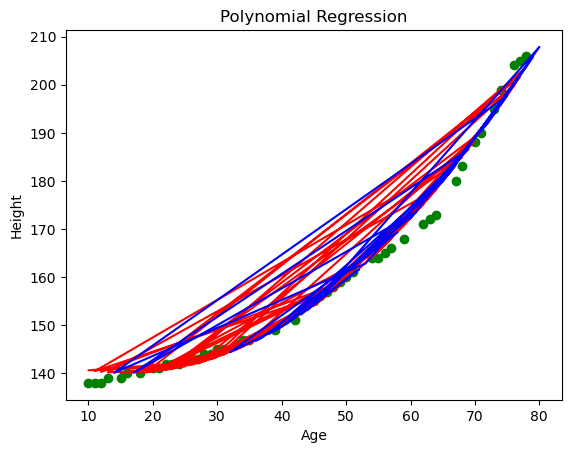

In [38]:
# Visualise the Polynomial Regression Results 
plt.scatter(X_train, y_train, color = 'green') 
  
plt.plot(X_train, PolyReg.predict(polynom.fit_transform(X_train)), color = 'red') 
plt.plot(X_test, PolyReg.predict(polynom.fit_transform(X_test)), color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('Age') 
plt.ylabel('Height') 
  
plt.show()

In [39]:
#Predicted Height from test dataset w.r.t Simple Linear Regression
y_predict_slr = LinReg.predict(X_test)

#Model Evaluation using R-Square for Simple Linear Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Simple Linear Regression:', r_square)

R-Square Error associated with Simple Linear Regression: 0.8727873738671587


In [40]:
#Predicted Height from test dataset w.r.t Polynomial Regression
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))

#Model Evaluation using R-Square for Polynomial Regression
#from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.9892511710983519


In [41]:
# Predicting Height based on Age using Linear Regression 
LinReg.predict([[33]])

array([150.14189273])

In [42]:
# Predicting Height based on Age using Polynomial Regression 
PolyReg.predict(polynom.fit_transform([[33]]))

array([144.92592448])

## 过拟合
#过拟合：具体表现就是最终模型在训练集上效果好；在测试集上效果差。模型泛化能力弱。
#具体表现就是最终模型在训练集上效果好；在测试集上效果差。模型泛化能力弱。
#原因
#训练数据中噪音干扰过大，使得学习器认为部分噪音是特征从而扰乱学习规则。
#建模样本选取有误，例如训练数据太少，抽样方法错误，样本label错误等，导致样本不能代表整体。
#模型不合理，或假设成立的条件与实际不符。
#特征维度/参数太多，导致模型复杂度太高。

## 2.1 欠拟合的定义
欠拟合是指对训练样本的一般性质尚未学好。在训练集及测试集上的表现都不好。

2.2 欠拟合的原因
1）模型复杂度过低
2）特征量过少